In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import time
import matplotlib.pyplot as plt
import warnings
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("train.csv")
ID = data['id']

#Drop unnecessary columns
data = data.iloc[:,1:]

In [15]:
data['log_loss'] = np.log(data['loss'])

In [5]:
seed = 7
test_size = 0.2

In [12]:
n_data = 10000

cont_X = data.iloc[0:n_data, 116:130]
cat_X = data.iloc[0:n_data, 0:116]
X = data.iloc[0:n_data, :130]

Y = data.iloc[0:n_data, 130:131]
log_Y = data.iloc[0:n_data, 131:132]

In [13]:
#One hot encoding of categorical data

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(cat_X)

OneHot_X = enc.transform(cat_X).toarray()

new_X1 = np.c_[OneHot_X, cont_X]

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(new_X1, Y, test_size=test_size, random_state=seed)

y_train = y_train.iloc[:,0]
model = XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_pred, y_test)
print("Mean absolute error : " + str(mae))

Time = time.time() - start_time
print("-- " + str(Time) + " seconds --")

Mean absolute error : 1279.667218231201
-- 30.5460000038 seconds --


In [14]:
#Dummies encoding of categorical data

dummies_X = np.array(pd.get_dummies(cat_X))
new_X2 = np.c_[dummies_X, cont_X]

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(new_X2, log_Y, test_size=test_size, random_state=seed)

y_train = y_train.iloc[:,0]
model = XGBRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
print("Mean absolute error : " + str(mae))

Time = time.time() - start_time
print("-- " + str(Time) + " seconds --")

Mean absolute error : 1206.9457547509767
-- 30.3170001507 seconds --


In [95]:
stepsize = 10000

In [17]:
#T_h = []
#MAE_h = []
#N_h = []
#
#
#
#for i in range(1, 10):
#    print(i)
#    n_data = i*stepsize
#    N_h.append(n_data)
#    
#    cont_X = data.iloc[0:n_data, 116:130]
#    cat_X = data.iloc[0:n_data, 0:116]
#    X = data.iloc[0:n_data, :130]
#
#    Y = data.iloc[0:n_data, 130:131]
#    
#    enc = OneHotEncoder(handle_unknown='ignore')
#    enc.fit(cat_X)
#
#    OneHot_X = enc.transform(cat_X).toarray()
#
#    new_X1 = np.c_[OneHot_X, cont_X]
#
#    start_time = time.time()
#
#    X_train, X_test, y_train, y_test = train_test_split(new_X1, Y, test_size=test_size, random_state=seed)
#
#    y_train = y_train.iloc[:,0]
#    model = XGBRegressor()
#    model.fit(X_train,y_train)
#
#    y_pred = model.predict(X_test)
#
#    mae = mean_absolute_error(y_pred, y_test)
#    MAE_h.append(mae)
#
#    Time = time.time() - start_time
#    T_h.append(Time)

In [18]:
#T_d = []
#MAE_d = []
#N_d = []
#
#
#for i in range(1, 10):
#    print(i)
#    n_data = i*stepsize
#    N_d.append(n_data)
#    
#    cont_X = data.iloc[0:n_data, 116:130]
#    cat_X = data.iloc[0:n_data, 0:116]
#    X = data.iloc[0:n_data, :130]
#
#    Y = data.iloc[0:n_data, 130:131]
#    
#    dummies_X = np.array(pd.get_dummies(cat_X))
#    new_X2 = np.c_[dummies_X, cont_X]
#
#    start_time = time.time()
#
#    X_train, X_test, y_train, y_test = train_test_split(new_X2, Y, test_size=test_size, random_state=seed)
#
#    y_train = y_train.iloc[:,0]
#    model = XGBRegressor()
#    model.fit(X_train,y_train)
#
#    y_pred = model.predict(X_test)
#
#    mae = mean_absolute_error(y_pred, y_test)
#    MAE_d.append(mae)
#
#    Time = time.time() - start_time
#    T_d.append(Time)

In [19]:
#fig = plt.figure(figsize=(10,5))
#ax = fig.add_subplot(111)
#ax.set_xlabel('Time (seconds)',fontsize = 14 )
#ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
#ax.tick_params(labelsize=14)
#ax.set_title('Plot of base XGBoost',fontsize = 20)
#ax.plot(T_h, MAE_h, label = 'One-hot encoding')
#ax.plot(T_d, MAE_d, label = 'Get dummies')
#ax.legend(prop={'size': 15})
##ax = formatting_loss(ax)
#plt.show()

In [21]:
stepsize = 10000

In [22]:
#Loss

N_loss =[]
MAE_loss = []
T_loss = []

for i in range(1, 8):
    print(i)
    n_data = i*stepsize
    N_loss.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    model = XGBRegressor()
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_pred, y_test)
    MAE_loss.append(mae)

    Time = time.time() - start_time
    T_loss.append(Time)

1
2
3
4
5
6
7


In [23]:
#Log(loss)

N_log =[]
MAE_log = []
T_log = []

for i in range(1, 8):
    print(i)
    n_data = i*stepsize
    N_log.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(new_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    model = XGBRegressor()
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_log.append(mae)

    Time = time.time() - start_time
    T_log.append(Time)

1
2
3
4
5
6
7


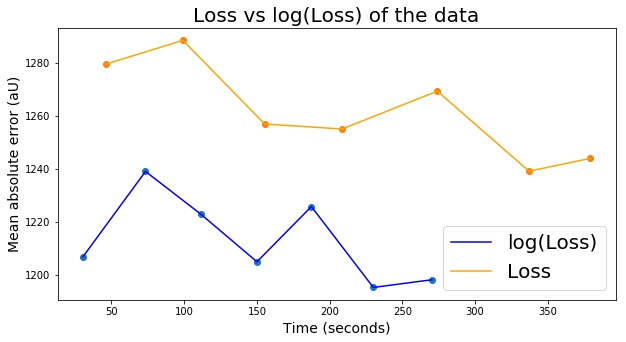

In [46]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(T_log, MAE_log, 'o')
ax.plot(T_log, MAE_log, 'blue', label = 'log(Loss)')
ax.plot(T_loss, MAE_loss, 'o')
ax.plot(T_loss, MAE_loss, 'orange', label = 'Loss')
ax.set_title('Loss vs log(Loss) of the data', size = 20)
ax.set_xlabel('Time (seconds)',fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()